In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:

# Step 1: Data Preprocessing

data = pd.read_csv('housepricing_Data.csv')

# Show first 5 rows
print("First 5 rows of dataset:\n", data.head())

# Check data types and missing values
print("\nDataset info:")
print(data.info())
print("\nMissing values per column:\n", data.isnull().sum())

First 5 rows of dataset:
    HouseSize  Bedrooms  Age  DistanceToCityCenter   Price
0       1200         3   10                     5  300000
1       1500         4    5                     3  400000
2        800         2   20                    10  150000
3       2000         5    2                     2  500000
4       1700         4    8                     4  350000

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HouseSize             10 non-null     int64
 1   Bedrooms              10 non-null     int64
 2   Age                   10 non-null     int64
 3   DistanceToCityCenter  10 non-null     int64
 4   Price                 10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes
None

Missing values per column:
 HouseSize               0
Bedrooms                0
Age                     0
DistanceToCi

In [7]:
# Step 2: Data Cleaning

data.fillna(data.mean(), inplace=True)


data.drop_duplicates(inplace=True)


from scipy import stats
z_scores = np.abs(stats.zscore(data[['HouseSize','Bedrooms','Age','DistanceToCityCenter','Price']]))
data = data[(z_scores < 3).all(axis=1)]  

In [6]:
# Step 3: Data Manipulation


X = data[['HouseSize', 'Bedrooms', 'Age', 'DistanceToCityCenter']]
y = data['Price']

# You can also create new features if needed
# Example: Price per sq ft (optional)
data['PricePerSqFt'] = data['Price'] / data['HouseSize']


In [8]:
# Step 4: Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R-squared:", r2)



Model Coefficients: [-6.28076607e+01  7.93053789e+04 -9.27956909e+03 -2.76090372e+03]
Intercept: 244976.43450287485

Mean Squared Error: 104115583.94449048
R-squared: -0.04115583944490475


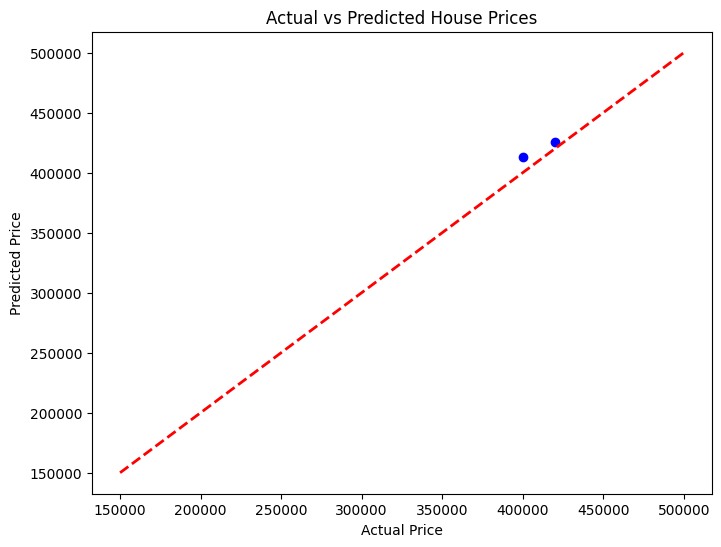

In [9]:
# Step 5: Visualization

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()




In [10]:
# Step 6: Predict new house price

new_house = [[1500, 3, 5, 4]]  
predicted_price = model.predict(new_house)
print("\nPredicted price for new house:", predicted_price[0])



Predicted price for new house: 331239.61995960283


C:\Users\devad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
